In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3.1 

3.1 a

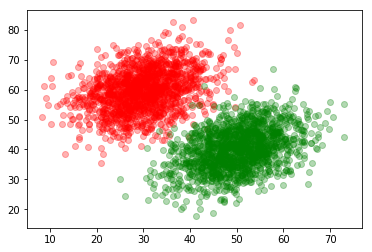

In [2]:
#generate two gaussian distributions
mean = [30, 60]
cov = [[50, 20], [20, 50]]  # covariance
x, y = np.random.multivariate_normal(mean, cov, 1500).T
plt.scatter(x, y, c = 'r', alpha = 0.3)
x1, y1= x, y

mean = [50, 40]
cov = [[50, 20], [20, 50]]  # covariance
x, y= np.random.multivariate_normal(mean, cov, 1500).T
x2, y2 = x, y
plt.scatter(x, y, c = 'g', alpha = 0.3)

(array([ 1.,  0.,  2.,  0.,  3.,  5.,  5.,  7.,  5.,  9., 14., 11., 16.,
        18., 20., 39., 43., 46., 57., 51., 70., 65., 78., 55., 75., 89.,
        86., 86., 65., 70., 62., 60., 50., 41., 51., 25., 25., 20., 23.,
        16.,  7.,  7.,  6.,  7.,  1.,  3.,  2.,  1.,  1.,  1.]),
 array([ 71.55652785,  73.75642372,  75.95631958,  78.15621544,
         80.35611131,  82.55600717,  84.75590303,  86.9557989 ,
         89.15569476,  91.35559063,  93.55548649,  95.75538235,
         97.95527822, 100.15517408, 102.35506994, 104.55496581,
        106.75486167, 108.95475754, 111.1546534 , 113.35454926,
        115.55444513, 117.75434099, 119.95423685, 122.15413272,
        124.35402858, 126.55392445, 128.75382031, 130.95371617,
        133.15361204, 135.3535079 , 137.55340376, 139.75329963,
        141.95319549, 144.15309136, 146.35298722, 148.55288308,
        150.75277895, 152.95267481, 155.15257067, 157.35246654,
        159.5523624 , 161.75225827, 163.95215413, 166.15204999,
        168.

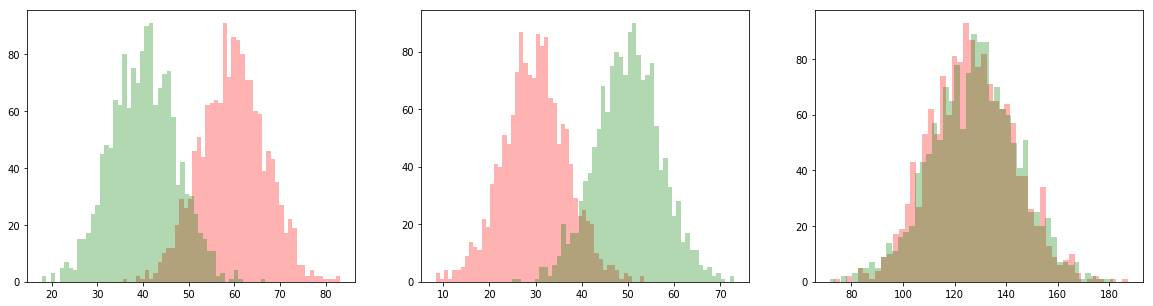

In [3]:
# project two ditributions
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
# w = (0 1)^T
ax[0].hist(y1, bins = 50,color = 'r', alpha = 0.3)
ax[0].hist(y2, bins = 50,color = 'g', alpha = 0.3)
# w = (1 0)^T
ax[1].hist(x1, bins = 50,color = 'r', alpha = 0.3)
ax[1].hist(x2, bins = 50,color = 'g', alpha = 0.3)
# w = (cos(pi/4) sin(pi/4))^T, in another word projection line is y = x
w = math.sqrt(2)
ax[2].hist((x1 + y1)*w, bins = 50, color = 'r', alpha = 0.3)
ax[2].hist((x2 + y2)*w, bins = 50, color = 'g', alpha = 0.3)

3.1 b

In [4]:
# define functions
def rotate(w1, w2, theta):
    w1_theta = math.cos(theta)*w1 - math.sin(theta)*w2
    w2_theta = math.sin(theta)*w1 + math.cos(theta)*w2
    w = np.mat([w1_theta, w2_theta]).T
    #print ('w is:', w)
    return w

def project_vector(w, x, y, n):
    x_project = []
    
    for i in range(n):
        #print (i)
        xi = x[i]
        yi = y[i]
        new_point = np.asarray(np.mat([xi, yi])*w*w.T)
        New_point = list(new_point)
       # print('newpoint is ',new_point, type(New_point))
        xn = float(new_point[:,0])
        yn = float(new_point[:,1])
        x_project.append(xn + yn)
    return x_project

def mu_sigma(y, n):
    mu = np.sum(y)/n
    sigma = np.sum((y - mu)**2)/n
    return mu, sigma

def fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = (na/(na + nb))*sigma_a + (nb/(na +nb))*sigma_b
    F = numerator/denominator
    return F

In [5]:
# I define w(0) = [1, 0]^T here
theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F = []

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i)    
    x1_project = project_vector(w, x1, y1, 1500)
    x2_project = project_vector(w, x2, y2, 1500)
    
    mu_a, sigma_a = mu_sigma(x1_project, 1500)
    mu_b, sigma_b = mu_sigma(x2_project, 1500)
    F.append(fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, 1500, 1500))
    
#     print(w,'theta is:',theta_i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F[i])
#     print('---------------------------------------------------')

F_max = np.max(F)
place = np.where(F == np.max(F))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum fisher ratio is:  25.39432575437082  when theat equals to: [2.36935759]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


3.2 a

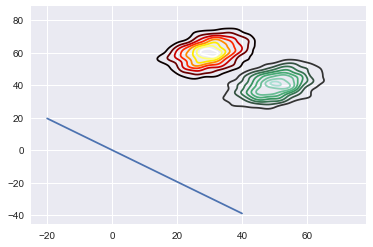

In [6]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)

3.2 b

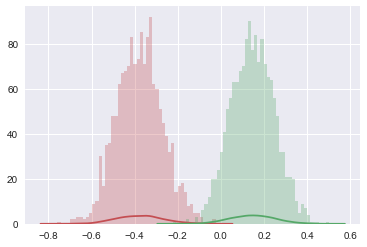

In [25]:
#use w from above, plot histogram of project 
w = rotate(w1, w2, Theta)
x1_project = project_vector(w, x1, y1, 1500)
x2_project = project_vector(w, x2, y2, 1500)
plt.hist(x1_project, bins = 50,color = 'r', alpha = 0.3)
plt.hist(x2_project, bins = 50,color = 'g', alpha = 0.3)
sns.kdeplot(x1_project, color ='r') # kernel density estimator (kde)
sns.kdeplot(x2_project, color ='g') # kde smooths histograms into pdfs



In [38]:
# take log ( ratio of probabilities of (y vs not-y) )
def logratio(a, b, eps=1e-14):  
    a=a+eps # to prevent taking logs of 0 or infinity
    b=b+eps # to prevent taking logs of 0 or infinity
    return np.log(a/b)

def sigmoid(x):
    return 1/(1+np.exp(-x))


binedge = np.linspace(-1.0, 0.6, 50) 
mid = np.mean((binedge[1:]-binedge[:-1])/2) 
x_grid = binedge[:-1] + mid

x1hist = np.histogram(x1_project, bins=binedge, density="True")
x2hist = np.histogram(x2_project, bins=binedge, density="True")
x1_hist = x1hist[0]
x2_hist = x2hist[0]

print('x1_hist', x1_hist, 'x_grid', x_grid)
print(x1hist[1],x2hist[1])
print(binedge)


x1_hist [0.         0.         0.         0.         0.         0.
 0.         0.02041667 0.         0.08166667 0.1225     0.10208333
 0.3675     0.98       1.51083333 2.10291667 3.0625     3.22583333
 3.53208333 3.45041667 3.87916667 2.55208333 2.14375    1.49041667
 0.69416667 0.71458333 0.30625    0.22458333 0.         0.06125
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ] x_grid [-0.98367347 -0.95102041 -0.91836735 -0.88571429 -0.85306122 -0.82040816
 -0.7877551  -0.75510204 -0.72244898 -0.68979592 -0.65714286 -0.6244898
 -0.59183673 -0.55918367 -0.52653061 -0.49387755 -0.46122449 -0.42857143
 -0.39591837 -0.36326531 -0.33061224 -0.29795918 -0.26530612 -0.23265306
 -0.2        -0.16734694 -0.13469388 -0.10204082 -0.06938776 -0.03673469
 -0.00408163  0.02857143  0.06122449  0.09387755  0.12653061  0.15918367
  0.19183673  0.2244898   0.257142

In [39]:
print(len(x_grid),len(lodds))


49 49


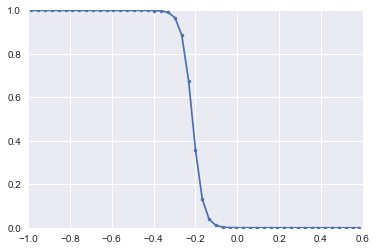

In [40]:
lodds=logratio(x1_hist, x2_hist, 1e-16) + \
        logratio(len(x1_project), len(x2_project))
lrfit=np.polyfit(x_grid, lodds, deg=1) # straight line fit

axes = plt.gca()
axes.set_xlim([-1,0.6])
axes.set_ylim([0,1])
plt.plot(x_grid,sigmoid(lrfit[0]*x_grid+lrfit[1]),'b.-')


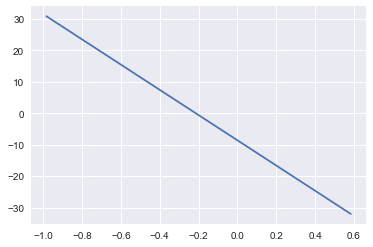

In [41]:
plt.plot(x_grid,(lrfit[0]*x_grid + lrfit[1])) # lrfit[0] is the slope 

3.2 c

def unbalanced_fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = sigma_a + sigma_b
    F = numerator/denominator
    return F_unbalanced
# repeat what we`ve done in 3.1 b

theta = np.linspace(0.,math.pi,90)
w1 = 1 
w2 = 0
F_unbalanced = []

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i) 
    x1_project = project_vector(w, x1, y1, 1500)
    x2_project = project_vector(w, x2, y2, 1500)
    
    mu_a, sigma_a = mu_sigma(x1_project, 1500)
    mu_b, sigma_b = mu_sigma(x2_project, 1500)
    F_unbalanced.append(unbalanced_fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, 1500, 1500))
    
    print(w,'theta is:',theta_i,'i is: ', i)
    print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
    print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
    print('fisher ratio is:', F[i])
    print('---------------------------------------------------')

F_max = np.max(F_unbalanced)
place = np.where(F_unbalanced == np.max(F_unbalanced))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')